In [2]:
import re
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Open and parse iperf3 output
def parse_iperf(file_path):
    # Initialize lists to store parsed data
    intervals, transfers, bitrates, retransmissions, cwnds = [], [], [], [], []
    
    # Regex pattern to match data rows
    pattern = re.compile(r'\[\s*\d+\]\s+([\d\.]+-[\d\.]+)\s+sec\s+([\d\.]+)\s+(MBytes|GBytes)\s+([\d\.]+)\s+(Mbits/sec|Gbits/sec)\s+(\d+)\s+([\d\.]+)\s+(KBytes|MBytes)')
    
    # Open and parse the file
    with open(file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                interval = match.group(1)
                transfer = float(match.group(2)) * (1024 if match.group(3) == "GBytes" else 1)
                bitrate = float(match.group(4)) * (1000 if match.group(5) == "Gbits/sec" else 1)
                retrans = int(match.group(6))
                cwnd = float(match.group(7)) * (1024 if match.group(8) == "MBytes" else 1)
    
                # Append parsed data to lists
                intervals.append(interval)
                transfers.append(transfer)
                bitrates.append(bitrate)
                retransmissions.append(retrans)
                cwnds.append(cwnd)
    
    # Create a DataFrame from the parsed data
    data = {
        "Interval": intervals,
        "Transfer (MB)": transfers,
        "Bitrate (Mbps)": bitrates,
        "Retransmissions": retransmissions,
        "CWND (KB)": cwnds
    }
    df = pd.DataFrame(data)
    return df

In [4]:
def plot_iperf3_data(df):
    # Extracting the time intervals for x-axis
    time_intervals = df["Interval"].str.split("-", expand=True)[1].astype(float)

    # Creating a plot for Bitrate
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(time_intervals, df["Bitrate (Mbps)"], label="Bitrate (Mbps)", color='blue', marker='o')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Bitrate (Mbps)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Creating a secondary y-axis for CWND
    ax2 = ax1.twinx()
    ax2.plot(time_intervals, df["CWND (KB)"], label="CWND (KB)", color='orange', marker='x', linestyle='--')
    ax2.set_ylabel("CWND (KB)", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    
    # Adding title and grid
    plt.title("BBR: Bitrate and Congestion Window over Time")
    fig.tight_layout()  # Adjust layout to prevent overlap

    # Show the plot
    plt.show()

In [5]:
df_cubic = parse_iperf("../data/video/throughput_client.log")
df_cubic

FileNotFoundError: [Errno 2] No such file or directory: '../data/video/throughput_client.log'

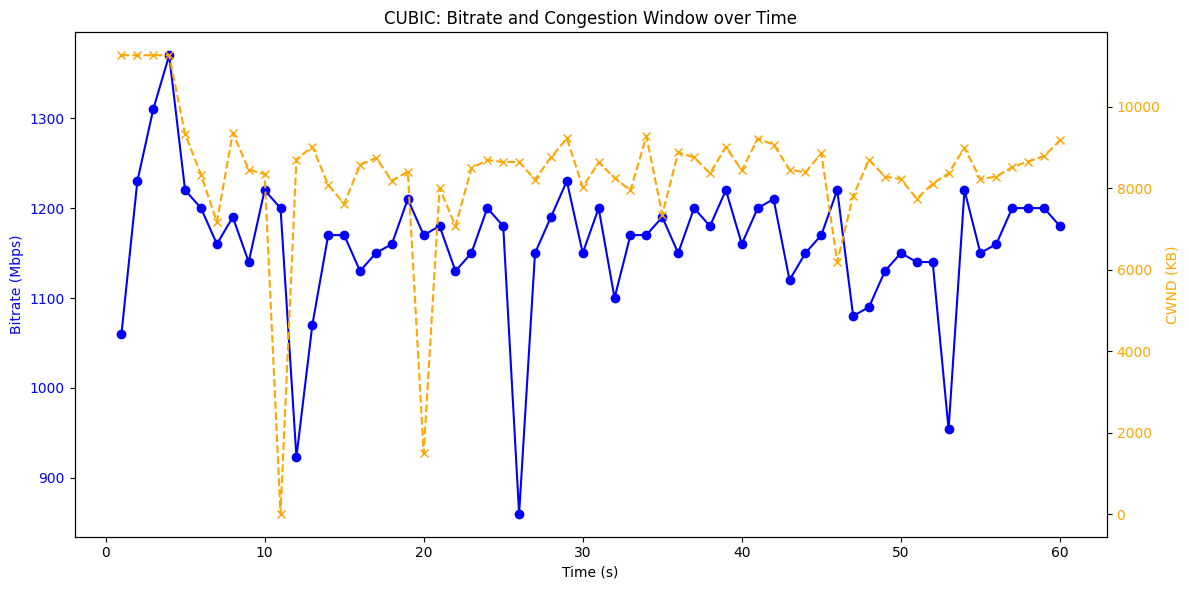

In [13]:
plot_iperf3_data(df_cubic)

In [6]:
df_bbr = parse_iperf("../data/video/bbr/throughput_client.log")
df_bbr.head(20)

,Interval,Transfer (MB),Bitrate (Mbps),Retransmissions,CWND (KB)
0,0.00-1.00,122.0,1020.0,187,11264.00
1,1.00-2.00,141.0,1180.0,2890,11264.00
2,2.00-3.00,150.0,1260.0,0,8601.60
3,3.00-4.00,128.0,1070.0,279,8960.00
4,4.00-5.00,126.0,1060.0,1025,7188.48
5,5.00-6.00,138.0,1150.0,0,7577.60
6,6.00-7.00,132.0,1110.0,992,8458.24
7,7.00-8.00,129.0,1080.0,0,5140.48
8,8.00-9.00,129.0,1080.0,0,8898.56
9,9.00-10.00,136.0,1140.0,108,8335.36


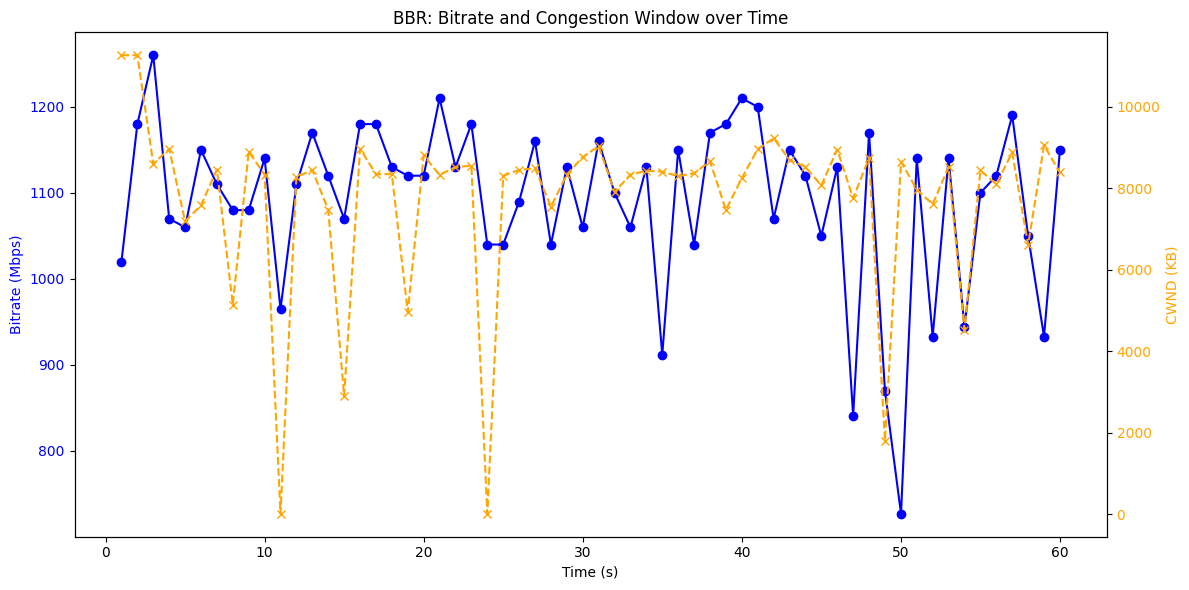

In [7]:
plot_iperf3_data(df_bbr)

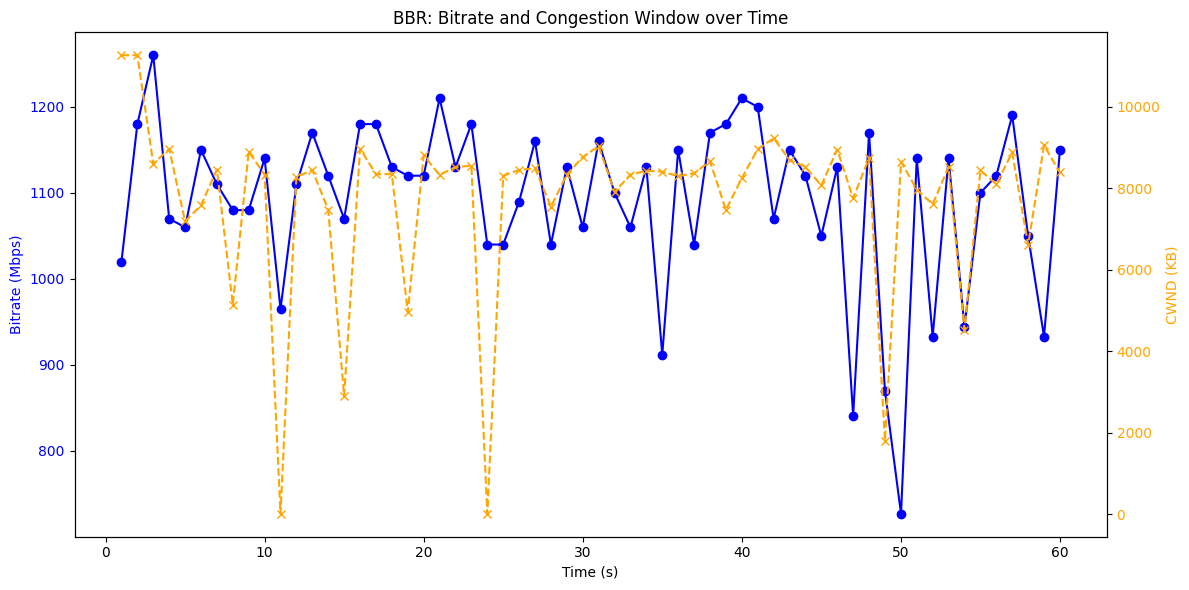

In [8]:
plot_iperf3_data(df_bbr)

In [15]:
def parse_iperf3_throughput(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Match interval, transfer, and bitrate
            match = re.search(r"(\d+\.\d+-\d+\.\d+)\s+sec\s+[\d.]+\s+[MG]Bytes\s+([\d.]+)\s+([MG]bits/sec)", line)
            if match:
                interval = match.group(1)  # e.g., "0.00-1.00"
                bitrate = float(match.group(2))  # Extract bitrate
                unit = match.group(3)  # Extract the unit (e.g., "Mbits/sec" or "Gbits/sec")

                # Convert Gbits/sec to Mbits/sec if necessary
                if "Gbits/sec" in unit:
                    bitrate *= 1000
                
                data.append((interval, bitrate))

    return pd.DataFrame(data, columns=["Interval", "Throughput (Mbps)"])

# Example Usage
df_cubic = parse_iperf3_throughput("../data/video/cubic/throughput_client.log")
df_bbr = parse_iperf3_throughput("../data/video/bbr/throughput_client.log")
# print(df_cubic.head(10))
print(df_bbr.head(10))

     Interval  Throughput (Mbps)
0   0.00-1.00             1020.0
1   1.00-2.00             1180.0
2   2.00-3.00             1260.0
3   3.00-4.00             1070.0
4   4.00-5.00             1060.0
5   5.00-6.00             1150.0
6   6.00-7.00             1110.0
7   7.00-8.00             1080.0
8   8.00-9.00             1080.0
9  9.00-10.00             1140.0


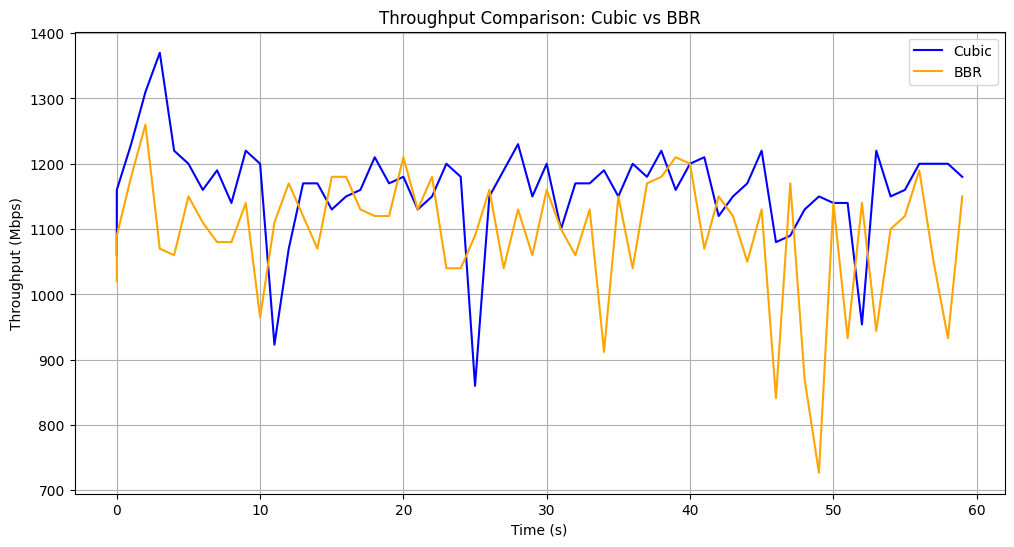

In [16]:
# Example corrected plotting function
def plot_throughput_comparison(df_cubic, df_bbr):
    # Convert interval to start time
    df_cubic['Time (s)'] = df_cubic['Interval'].str.split('-').str[0].astype(float)
    df_bbr['Time (s)'] = df_bbr['Interval'].str.split('-').str[0].astype(float)

    # Sort the data by time
    df_cubic = df_cubic.sort_values(by='Time (s)')
    df_bbr = df_bbr.sort_values(by='Time (s)')

    # Plot the throughput
    plt.figure(figsize=(12, 6))
    plt.plot(df_cubic['Time (s)'], df_cubic['Throughput (Mbps)'], label='Cubic', color='blue')
    plt.plot(df_bbr['Time (s)'], df_bbr['Throughput (Mbps)'], label='BBR', color='orange')
    
    # Add labels, title, and legend
    plt.xlabel('Time (s)')
    plt.ylabel('Throughput (Mbps)')
    plt.title('Throughput Comparison: Cubic vs BBR')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Call the function with your DataFrames
plot_throughput_comparison(df_cubic, df_bbr)

## Loss

In [25]:
df_loss5_cubic_iperf = parse_iperf("../data/video/loss5/cubic/throughput_client.log")
df_loss5_cubic_iperf.head()

,Interval,Transfer (MB),Bitrate (Mbps),Retransmissions,CWND (KB)
0,0.00-1.00,130.0,1090.0,0,7680.00
1,1.00-2.00,148.0,1240.0,379,5376.00
2,2.00-3.00,126.0,1060.0,1202,2764.80
3,3.00-4.00,130.0,1090.0,0,2908.16
4,4.00-5.00,135.0,1130.0,0,3020.80


In [26]:
df_loss5_bbr_iperf = parse_iperf("../data/video/loss5/bbr/throughput_client.log")
df_loss5_bbr_iperf.head()

,Interval,Transfer (MB),Bitrate (Mbps),Retransmissions,CWND (KB)
0,0.00-1.00,131.0,1100.0,57,11264.0
1,1.00-2.00,149.0,1250.0,0,11264.0
2,2.00-3.00,156.0,1310.0,0,11264.0
3,3.00-4.00,161.0,1350.0,0,11264.0
4,4.00-5.00,146.0,1230.0,1473,10444.8


In [27]:
df_loss1_cubic_iperf = parse_iperf("../data/video/loss10/cubic/throughput_client.log")
df_loss1_cubic_iperf.head()

,Interval,Transfer (MB),Bitrate (Mbps),Retransmissions,CWND (KB)
0,0.00-1.00,135.0,1130.0,0,7690.24
1,1.00-2.00,161.0,1350.0,0,7813.12
2,2.00-3.00,154.0,1290.0,110,5468.16
3,3.00-4.00,158.0,1320.0,0,5468.16
4,4.00-5.00,152.0,1280.0,349,3921.92


In [28]:
df_loss1_bbr_iperf = parse_iperf("../data/video/loss10/bbr/throughput_client.log")
df_loss1_bbr_iperf.head()

,Interval,Transfer (MB),Bitrate (Mbps),Retransmissions,CWND (KB)
0,0.00-1.00,106.0,889.0,1158,11059.20
1,1.00-2.00,145.0,1220.0,0,8878.08
2,2.00-3.00,144.0,1210.0,0,8171.52
3,3.00-4.00,140.0,1170.0,0,7526.40
4,4.00-5.00,138.0,1150.0,278,9031.68


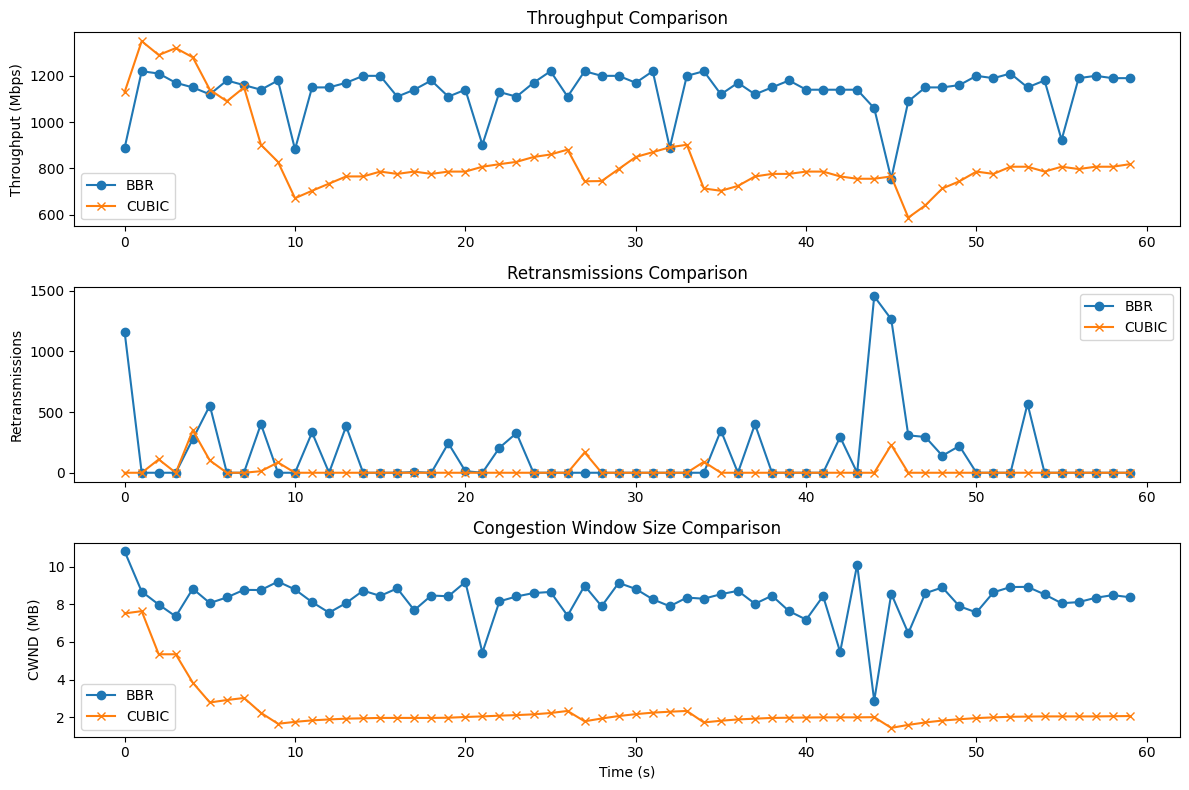

In [29]:
# Convert CWND from KB to MB for better readability
df_loss1_bbr_iperf["CWND (MB)"] = df_loss1_bbr_iperf["CWND (KB)"] / 1024
df_loss1_cubic_iperf["CWND (MB)"] = df_loss1_cubic_iperf["CWND (KB)"] / 1024

# Extract time interval start for plotting
df_loss1_bbr_iperf["Interval Start (s)"] = df_loss1_bbr_iperf["Interval"].str.split("-").str[0].astype(float)
df_loss1_cubic_iperf["Interval Start (s)"] = df_loss1_cubic_iperf["Interval"].str.split("-").str[0].astype(float)

# Plotting
plt.figure(figsize=(12, 8))

# Bitrate Plot
plt.subplot(3, 1, 1)
plt.plot(df_loss1_bbr_iperf["Interval Start (s)"], df_loss1_bbr_iperf["Bitrate (Mbps)"], label="BBR", marker='o')
plt.plot(df_loss1_cubic_iperf["Interval Start (s)"], df_loss1_cubic_iperf["Bitrate (Mbps)"], label="CUBIC", marker='x')
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput Comparison")
plt.legend()

# Retransmissions Plot
plt.subplot(3, 1, 2)
plt.plot(df_loss1_bbr_iperf["Interval Start (s)"], df_loss1_bbr_iperf["Retransmissions"], label="BBR", marker='o')
plt.plot(df_loss1_cubic_iperf["Interval Start (s)"], df_loss1_cubic_iperf["Retransmissions"], label="CUBIC", marker='x')
plt.ylabel("Retransmissions")
plt.title("Retransmissions Comparison")
plt.legend()

# Congestion Window Plot
plt.subplot(3, 1, 3)
plt.plot(df_loss1_bbr_iperf["Interval Start (s)"], df_loss1_bbr_iperf["CWND (MB)"], label="BBR", marker='o')
plt.plot(df_loss1_cubic_iperf["Interval Start (s)"], df_loss1_cubic_iperf["CWND (MB)"], label="CUBIC", marker='x')
plt.xlabel("Time (s)")
plt.ylabel("CWND (MB)")
plt.title("Congestion Window Size Comparison")
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

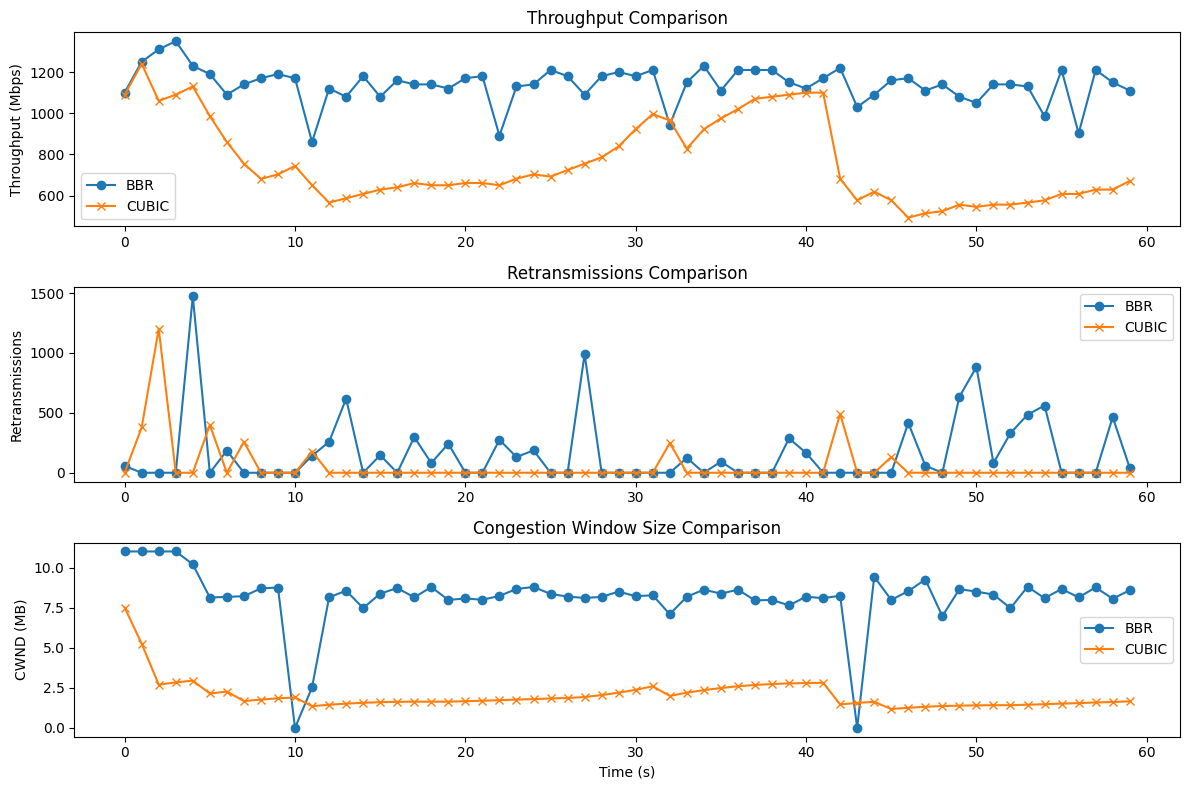

In [30]:
# Convert CWND from KB to MB for better readability
df_loss5_bbr_iperf["CWND (MB)"] = df_loss5_bbr_iperf["CWND (KB)"] / 1024
df_loss5_cubic_iperf["CWND (MB)"] = df_loss5_cubic_iperf["CWND (KB)"] / 1024

# Extract time interval start for plotting
df_loss5_bbr_iperf["Interval Start (s)"] = df_loss5_bbr_iperf["Interval"].str.split("-").str[0].astype(float)
df_loss5_cubic_iperf["Interval Start (s)"] = df_loss5_cubic_iperf["Interval"].str.split("-").str[0].astype(float)

# Plotting
plt.figure(figsize=(12, 8))

# Bitrate Plot
plt.subplot(3, 1, 1)
plt.plot(df_loss5_bbr_iperf["Interval Start (s)"], df_loss5_bbr_iperf["Bitrate (Mbps)"], label="BBR", marker='o')
plt.plot(df_loss5_cubic_iperf["Interval Start (s)"], df_loss5_cubic_iperf["Bitrate (Mbps)"], label="CUBIC", marker='x')
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput Comparison")
plt.legend()

# Retransmissions Plot
plt.subplot(3, 1, 2)
plt.plot(df_loss5_bbr_iperf["Interval Start (s)"], df_loss5_bbr_iperf["Retransmissions"], label="BBR", marker='o')
plt.plot(df_loss5_cubic_iperf["Interval Start (s)"], df_loss5_cubic_iperf["Retransmissions"], label="CUBIC", marker='x')
plt.ylabel("Retransmissions")
plt.title("Retransmissions Comparison")
plt.legend()

# Congestion Window Plot
plt.subplot(3, 1, 3)
plt.plot(df_loss5_bbr_iperf["Interval Start (s)"], df_loss5_bbr_iperf["CWND (MB)"], label="BBR", marker='o')
plt.plot(df_loss5_cubic_iperf["Interval Start (s)"], df_loss5_cubic_iperf["CWND (MB)"], label="CUBIC", marker='x')
plt.xlabel("Time (s)")
plt.ylabel("CWND (MB)")
plt.title("Congestion Window Size Comparison")
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


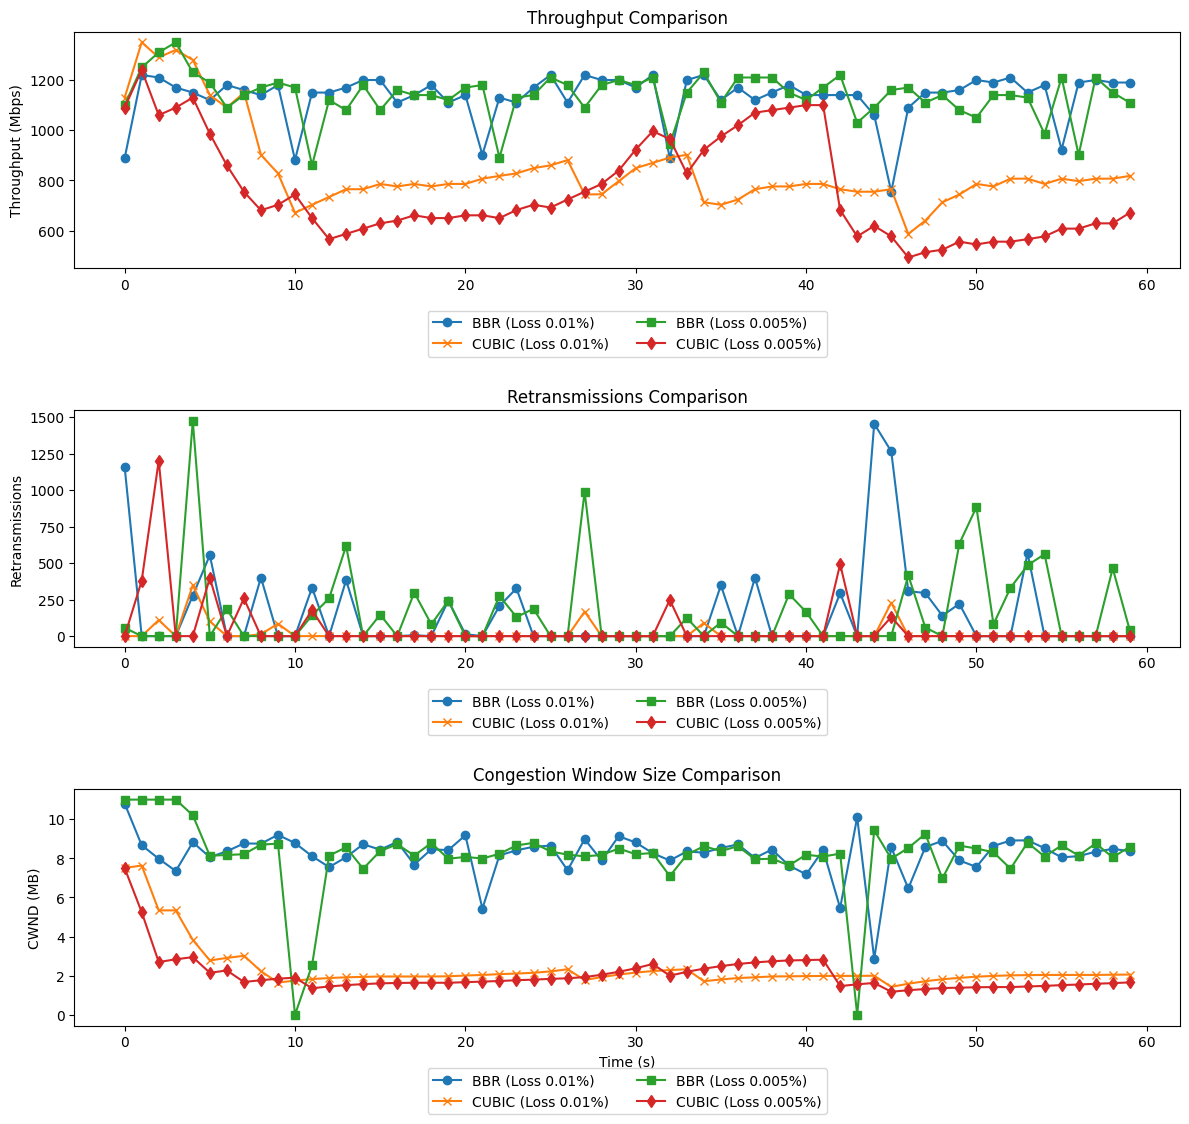

In [31]:
# Plotting
plt.figure(figsize=(12, 12))

# Bitrate Plot
plt.subplot(3, 1, 1)
plt.plot(df_loss1_bbr_iperf["Interval Start (s)"], df_loss1_bbr_iperf["Bitrate (Mbps)"], label="BBR (Loss 0.01%)", marker='o')
plt.plot(df_loss1_cubic_iperf["Interval Start (s)"], df_loss1_cubic_iperf["Bitrate (Mbps)"], label="CUBIC (Loss 0.01%)", marker='x')
plt.plot(df_loss5_bbr_iperf["Interval Start (s)"], df_loss5_bbr_iperf["Bitrate (Mbps)"], label="BBR (Loss 0.005%)", marker='s')
plt.plot(df_loss5_cubic_iperf["Interval Start (s)"], df_loss5_cubic_iperf["Bitrate (Mbps)"], label="CUBIC (Loss 0.005%)", marker='d')
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput Comparison")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)  # Adjusted spacing for legend

# Retransmissions Plot
plt.subplot(3, 1, 2)
plt.plot(df_loss1_bbr_iperf["Interval Start (s)"], df_loss1_bbr_iperf["Retransmissions"], label="BBR (Loss 0.01%)", marker='o')
plt.plot(df_loss1_cubic_iperf["Interval Start (s)"], df_loss1_cubic_iperf["Retransmissions"], label="CUBIC (Loss 0.01%)", marker='x')
plt.plot(df_loss5_bbr_iperf["Interval Start (s)"], df_loss5_bbr_iperf["Retransmissions"], label="BBR (Loss 0.005%)", marker='s')
plt.plot(df_loss5_cubic_iperf["Interval Start (s)"], df_loss5_cubic_iperf["Retransmissions"], label="CUBIC (Loss 0.005%)", marker='d')
plt.ylabel("Retransmissions")
plt.title("Retransmissions Comparison")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)  # Adjusted spacing for legend

# Congestion Window Plot
plt.subplot(3, 1, 3)
plt.plot(df_loss1_bbr_iperf["Interval Start (s)"], df_loss1_bbr_iperf["CWND (MB)"], label="BBR (Loss 0.01%)", marker='o')
plt.plot(df_loss1_cubic_iperf["Interval Start (s)"], df_loss1_cubic_iperf["CWND (MB)"], label="CUBIC (Loss 0.01%)", marker='x')
plt.plot(df_loss5_bbr_iperf["Interval Start (s)"], df_loss5_bbr_iperf["CWND (MB)"], label="BBR (Loss 0.005%)", marker='s')
plt.plot(df_loss5_cubic_iperf["Interval Start (s)"], df_loss5_cubic_iperf["CWND (MB)"], label="CUBIC (Loss 0.005%)", marker='d')
plt.xlabel("Time (s)")
plt.ylabel("CWND (MB)")
plt.title("Congestion Window Size Comparison")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)  # Adjusted spacing for legend

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add extra space at the top
plt.subplots_adjust(hspace=0.6)  # Increase space between subplots
plt.show()